## Special Notebook for ADRI ONLY:) 

In [ ]:
import importlib
#UN comment the del commands and re run this cell if you want to modify any of the util files
# And still want your new run to run using the new modification:) (Not running this does not
# guarantee that the notebook will run with old modification)


#del create_composite_ref_panel
import utils_no_mod
importlib.reload(utils_no_mod)

import pandas as pd
import numpy as np
import zarr
import pickle
from tqdm import trange
import math
from uuid import uuid4
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import collections
from utils_no_mod import create_composite_ref_panel, BidiBurrowsWheelerLibrary, get_matches_indices, replace_col, interpolate, interpolate_
from data_utils import remove_sample_from_ref, get_sample_index
#del setFwdValues
#del setBwdValues
import hmm_utils
importlib.reload(hmm_utils)
from hmm_utils import create_composite_chip_panel,setFwdValues, setBwdValues

In [ ]:
samples = [
    # "HG02445",
    # "HG02470",
    # "HG02325",
    # "HG02108",
    # "HG02508",
    # "HG02323",
    # "HG02332",
    # "HG02095",
    # "HG02051",
    # "HG02429",
    # "HG02442",
    # "HG01985",
    # "HG02330",
    # "HG02111",
    # "HG02339",
    # "HG02322",
    # "HG02419",
    # "HG02433",
    # "HG02309",
    # "HG02471",
    # "NA20355",
    # "NA19924",
    # "NA19913",
    # "NA20274",
    # "NA20321",
    # "NA20362",
    # "NA20320",
    # "NA20318",
    # "HG03009",
    # "HG03812",
    # "HG03902",
    # "HG03916",
    # "HG00956",
    # "HG02409",
    # "HG02402",
    # "HG01812",
    # "HG02386",
    # "HG01801",
    # "HG02382",
    # "HG02181",
    # "HG01794",
    # "HG02353",
    # "HG02180",
    # "HG02156",
    # "HG02391",
    # "HG01813",
    # "HG00879",
    # "HG02401",
    # "HG00864",

    # "HG02154",
    # "HG01806",
    # "HG02406",
    # "HG02389",
    # "HG01799",
    # "HG01796",
    # "HG01031",
    # "HG02408",
    # "HG02186",
    # "HG02351",
    # "NA12236",
    # "NA18747",
    # "NA18559",
    # "NA18596",
    # "NA18558",
    # "NA18626",
    # "NA18535",
    # "NA18547",
    # "NA18606",
    # "NA18625",
    # "NA18537",
    # "NA18566",
    # "NA18525",
    # "NA18634",
    # "NA18564",
    # "NA18647",
    # "NA18534",
    # "NA18632",
    # "NA18619",
    # "NA18552",
    # "NA18571",
    # "NA18531",
    # "NA18620",
    # "NA18555",
    # "NA18639",
    # "NA18641",
    # "NA18624",
    # "NA18579",
    # "HG03499",
    # "HG00174",
    # "HG00368",
    # "HG00350",
    # "HG00365",
    # "HG00183",
    # "HG00360",
    # "HG00324",
    # "HG00275",
    # "HG00186",
    # "HG00180",
    # "HG00310",
    # "HG00369",
    # "HG00343",
    # "HG00179",
    # "HG00177",
    # "HG00342",
    # "HG00290",
    # "HG00271",
    # "HG00277",
    # "HG00376",
    # "HG00375",
    # "HG00274",
    # "HG00381",
    # "HG00357",
    # "HG00151",
    # "HG00150",
    # "HG00250",
    # "HG00115",
    # "HG00244",
    # "HG00123",
    # "HG00141",
    # "HG01334",
    # "HG00137",
    # "HG00128",
    # "HG00118",
    # "HG00253",
    # "HG00262",
    # "HG00100",
    # "HG02215",
    # "HG00159",
    # "HG00140",
    # "HG00242",
    # "HG00240",
    # "HG00103",
    # "HG00231",
    # "HG00097",
    # "HG00246",
    # "HG00099",
    # "HG00119",
    # "NA20850",
    # "NA21086",
    # "NA21135",
    # "NA20895",
    # "NA21143",
    # "NA21126",
    # "NA21091",
    # "NA21127",
    # "NA20884",
    # "NA21093",
    # "NA21130",
    # "NA21095",
    # "NA21097",
    # "NA20851",
    # "NA20897",
    # "NA20859",
    # "NA20888",

    # "NA20892",
    # "NA21144",
    # "NA20846",
    # "NA21089",
    # "NA20866",
    # "NA20869",
    # "NA21108",
    # "NA21087",
    # "NA21098",
    # "NA21111",
    # "HG04206",
    # "HG03871",
    # "HG03967",
    # "HG04239",
    # "NA18972",
    # "NA18946",
    # "NA18999",
    # "NA18978",
    # "NA19091",
    # "NA18941",
    # "NA18992",
    # "NA18985",
    # "NA18962",
    # "NA18975",
    # "NA19055",
    # "NA18973",
    # "NA19089",
    # "NA18966",
    # "NA18986",
    # "NA19076",
    # "NA19054",
    # "NA18951",
    # "NA19074",
    # "NA18993",
    # "NA18983",
    # "NA18940",
    # "NA19063",
    # "NA18980",
    # "NA19057",
    # "HG02048",
    # "HG02064",
    # "HG01872",
    # "HG01596",
    # "HG01855",
    # "HG02140",
    # "HG02086",
    # "HG01841",
    # "HG01850",
    # "HG01871",
    # "HG02113",
    # "HG01863",
    # "HG01849",
    # "HG01843",
    # "HG01864",
    # "HG01862",
    # "HG01852",
    # "HG01853",
    # "HG01859",
    # "HG01866",
    # "HG01858",
    # "HG01868",
    # "HG01845",
    # "HG01865",
    # "NA19455",
    # "NA19035",
    # "NA19393",
    # "NA19448",
    # "NA19316",
    # "NA19456",
    # "NA19374",
    # "NA19474",
    # "NA19475",
    # "NA19376",
    # "NA19429",
    # "NA19438",
    # "NA19379",
    # "NA19394",
    # "NA19468",
    # "NA19449",
    # "NA19327",
    # "NA19397",
    # "NA19380",
    # "NA19375",
    # "NA19372",
    # "NA19452",
    # "NA19324",
    # "NA19435",
    # "NA19030",
    # "NA19026",
    # "NA19036",
    # "NA19391",
    # "NA19024",
    # "HG03460",
    # "HG03457",
    # "HG03556",
    # "HG03558",
    # "HG03437",
    # "HG03057",
    # "HG03074",
    # "HG03547",
    # "HG03077",
    # "HG03445",
    # "HG03078",
    # "HG03446",
    # "HG03557",
    # "HG03548",
    # "HG03084",
    # "HG03461",
    # "HG03567",
    # "HG03378",
    # "HG03022",
    # "NA20775",
    # "NA20771",
    # "NA20529",
    # "NA20832",
    # "NA20822",
    # "NA20770",
    # "NA20514",
    # "NA20755",
    # "NA20541",
    # "NA20505",
    # "NA20795",
    # "NA20753",
    # "NA20762",
    # "NA20786",
    "NA20509",
    # "NA20511",
    # "NA20803",
    # "NA20535",
    # "NA20582",
    # "NA20804",
    # "NA20799",
    # "NA20515",
    # "NA20760",
    # "NA20811",
    # "NA20589",
    # "NA20810",
    # "NA20814"
 ]

In [ ]:
# Load Data and deduplicate
from utils_no_mod import deduplicate
with open("/home/ec2-user/adriano/imputation/phase3/selphi-2/data/chip_id_list_full.txt", "rb") as fp:   # Unpickling
    chip_id_list = pickle.load(fp)
with open("/home/ec2-user/adriano/imputation/phase3/selphi-2/data/full_id_list_full.txt", "rb") as fp:   # Unpickling
    full_id_list = pickle.load(fp)
with open("/home/ec2-user/adriano/imputation/phase3/selphi-2/data/original_indicies_full.txt", "rb") as fp:   # Unpickling
    original_indicies = pickle.load(fp) 
with open("/home/ec2-user/adriano/imputation/phase3/selphi-2/data/chip_positions.txt", "rb") as fp:   # Unpickling
    chip_positions = pickle.load(fp)
chip_id_list, original_indicies = deduplicate(chip_id_list, full_id_list, chip_positions)

In [ ]:
# LOAD GENETIC MAP
import os
# PUT genetic map path here that beagle uses
genetic_map_path = "/home/ec2-user/resource_files/genetic_map_plink/plink.chr20.GRCh38.map"


def get_cm(recomb_maps, pos):
    # TODO: Change default pop
    for i in list(recomb_maps["default"].keys()):
        if pos <= i:
            return recomb_maps["default"][i]
    return list(recomb_maps["default"].keys())[-1]

map_pops = ["default",]
recomb_maps = {x:z for (x,z) in [[x, {k:v for (k,v) in [[row[3],row[2]] for _, row in pd.read_csv(genetic_map_path, sep=" ", comment="#").iterrows()]}] for x in map_pops]}
chip_positions_dedup = [int(x.split('-')[1]) for x in chip_id_list]
num_obs = len(chip_positions_dedup)
distances_cm = [get_cm(recomb_maps, x) for x in chip_positions_dedup]

ref_panel_full_array_full = zarr.load("/home/ec2-user/adriano/imputation/phase3/selphi-2/data/ref_panel_full_array.zip")
target_full_array = np.zeros((ref_panel_full_array_full.shape[0],2))

In [5]:
HAPS = [0,1]

for sample in samples:
    full_res_ = {}
    sample_index = get_sample_index(sample)
    target_full_array[:,0] = ref_panel_full_array_full[:,sample_index[0]]
    target_full_array[:,1] = ref_panel_full_array_full[:,sample_index[1]]

    ref_panel_full_array = remove_sample_from_ref(sample_index, ref_panel_full_array_full)

    ref_panel_chip_array = ref_panel_full_array[original_indicies,:]
    target_chip_array = target_full_array[original_indicies,:]
    combined_ref_panel_chip = np.concatenate([ref_panel_chip_array,target_chip_array],axis=1)
    print("Concatenated shape: ", combined_ref_panel_chip.shape)

    for hap in HAPS:

        bidi_pbwt = BidiBurrowsWheelerLibrary(combined_ref_panel_chip.T.astype(np.int8), 6400+hap)
        ppa_matrix = bidi_pbwt.getForward_Ppa()
        div_matrix = bidi_pbwt.getForward_Div()
        rev_ppa_matrix = bidi_pbwt.getBackward_Ppa()
        rev_div_matrix = bidi_pbwt.getBackward_Div()

        forward_pbwt_matches, forward_pbwt_hap_indices = bidi_pbwt.getForward_matches_indices()
        backward_pbwt_matches, backward_pbwt_hap_indices = bidi_pbwt.getBackward_matches_indices()

        num_chip_vars = 14778
        num_hid = ref_panel_full_array.shape[1]

        BI = np.zeros((num_hid,num_chip_vars))
        BJ = np.zeros((num_hid,num_chip_vars))

        for chip_var in trange(0,num_chip_vars):
            forward_pbwt_matches_=forward_pbwt_matches[:,chip_var]
            forward_pbwt_index=ppa_matrix[:,chip_var]
            backward_pbwt_matches_=backward_pbwt_matches[:,chip_var]
            backward_pbwt_index=np.flip(rev_ppa_matrix, axis=1)[:,chip_var]
            BI[:,chip_var] = forward_pbwt_matches_[forward_pbwt_index.argsort()][:num_hid]
            BJ[:,chip_var] = backward_pbwt_matches_[backward_pbwt_index.argsort()][:num_hid]

        chip_indicies = []
        matches = []
        matches_sum = []
        matches_max = []
        indicies_max_matches_set = []
        masked_data_list = []
        
        for i in trange(0,ref_panel_full_array.shape[1]):
            arr_1 = np.array(BJ[i,:])
            mask = BI[i,arr_1.argsort()[::-1]] == 1
            arr_2 = arr_1.argsort()[::-1]
            
            masked_data = np.ma.MaskedArray(arr_2, mask=~mask)
            matches_sum.append(sum(BJ[i,masked_data.compressed()[:]]))
            matches_max.append(max(BJ[i,masked_data.compressed()[:]]))
            masked_data_list.append(masked_data)
        matches_sum_indxs = np.array(matches_sum).argsort()[::-1]


        for match_idx in matches_sum_indxs[:len(matches_sum_indxs)//10]:
            indicies_max_matches_set.extend(
                list(masked_data_list[match_idx].compressed()[:25])
            )

        indicies_max_matches_set = np.array(indicies_max_matches_set)
        _, idx = np.unique(indicies_max_matches_set, return_index=True)
        indicies_max_matches_set = indicies_max_matches_set[np.sort(idx)]
        indicies_max_matches_set = list(indicies_max_matches_set)
        average = int(np.average(np.array(matches_max)))

        indicies_max_matches_set_new = []
        for c,i in enumerate(indicies_max_matches_set):
            flago = True
            for j in range(0,c):
                if abs(indicies_max_matches_set[j] - i) < average:
                    flago = False
            if flago:
                indicies_max_matches_set_new.append(i)

        indicies_max_matches_set_new = np.array(indicies_max_matches_set_new)
        indicies_max_matches_set_new = np.delete(indicies_max_matches_set_new, np.where(indicies_max_matches_set_new == 0), axis=0)
        all_haps, _, _ = create_composite_ref_panel(
            ref_panel_full_array,
            BJ,
            BI,
            original_indicies,
            matches_sum_indxs,
            indicies_max_matches_set_new,
            0
        )
        
        composite_chip_panel, _ = create_composite_chip_panel(
                        all_haps, num_obs
                    )
        ordered_matches = {}
        for i in range(0,composite_chip_panel.shape[1]):
            ordered_matches[i] = list(np.unique(composite_chip_panel[:,i]))
        alpha = setFwdValues(num_obs, ordered_matches, chip_positions_dedup,BI,BJ, None, distances_cm)
        post = setBwdValues(alpha.copy(), num_obs, ordered_matches, chip_positions_dedup, BJ, None, distances_cm)
        resultoo_fb = interpolate_(post.T, original_indicies, ref_panel_full_array)
        full_res_.setdefault(sample, []).append(resultoo_fb.copy())
        if hap == 1:
            print("saving results")
            with open(f'saved_dictionary_{str(sample)}_new_method.pkl', 'wb') as f:
                pickle.dump(full_res_, f)

Concatenated shape:  (14778, 6402)


100%|██████████| 14777/14777 [01:27<00:00, 168.04it/s]

saving results


NA20509
Control Passed! all good! :)
COMBINED beagle ERROR: 10985
COMBINED selphi HMM ERROR: 11268



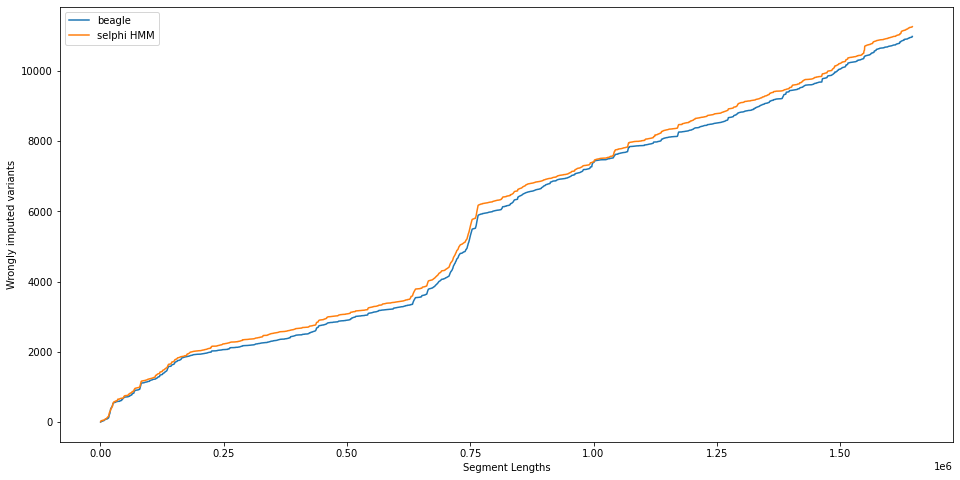

In [9]:
# PLOT results

# del plot_results
import utils_no_mod
importlib.reload(utils_no_mod)
from utils_no_mod import plot_results
folder_dict = {
    "beagle":"/home/ec2-user/adriano/imputation/phase3/selphi-2/data/validation_data/beagle_validated/",
    "selphi HMM":"./",
    # "selphi NO HMM":"./selpphi-imputed/",
}

# OVERWRITE SAMPLES
# samples = [
#     "HG02470",
# ]

plot_results(
    samples,
    folder_dict,
    ref_panel_full_array_full,
    target_full_array,
    original_indicies,
)

In [ ]:
# THIS is A TESTING CELL!!! Don't run if you don't need to:) 


# ordered_matches = {}
# for i in range(0,14778):
#     ordered_matches[i] = list(np.unique(composite_chip_panel[:25,i]))


del setFwdValues
del setBwdValues
import hmm_utils
importlib.reload(hmm_utils)
from hmm_utils import create_composite_chip_panel,setFwdValues, setBwdValues

for hapo in [0]:
    for sample in samples:
        alpha = setFwdValues(num_obs, ordered_matches, chip_positions_dedup,BI,BJ, None, distances_cm)
        post = setBwdValues(alpha.copy(), num_obs, ordered_matches, chip_positions_dedup, BJ, None, distances_cm)

START = original_indicies[0]
END = original_indicies[14777]

resultoo_fb = interpolate_(post.T, original_indicies, ref_panel_full_array)
print("selphi new interpolation forward-backward")
for sample in samples:
    new_x = target_full_array[:,1][START:END]
    y = resultoo_fb[START:END]
    print(int(y.shape - np.sum(new_x == y)))
